In [338]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

## Get and refine train data

In [339]:
train_listings = pd.read_csv('train_listing_data')
train_listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6052 entries, 0 to 6051
Data columns (total 49 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Unnamed: 0                                    6052 non-null   int64  
 1   id                                            6052 non-null   int64  
 2   description                                   5935 non-null   object 
 3   neighborhood_overview                         3344 non-null   object 
 4   host_since                                    6052 non-null   object 
 5   host_response_time                            3117 non-null   object 
 6   host_response_rate                            3117 non-null   object 
 7   host_acceptance_rate                          3327 non-null   object 
 8   host_is_superhost                             6052 non-null   object 
 9   host_neighbourhood                            4178 non-null   o

In [340]:
r_rating_train = train_listings["review_scores_rating"]
r_accuracy_train = train_listings["review_scores_accuracy"]
r_chekin_train = train_listings["review_scores_checkin"]
r_communication_train = train_listings["review_scores_communication"]
r_location_train = train_listings["review_scores_location"]
r_value_train = train_listings["review_scores_value"]

y_values_to_be_dropped = ["review_scores_rating", "review_scores_accuracy", "review_scores_checkin",
                         "review_scores_communication", "review_scores_location", "review_scores_value"]
train_listings = train_listings.drop(y_values_to_be_dropped, axis = 1)
train_listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6052 entries, 0 to 6051
Data columns (total 43 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Unnamed: 0                                    6052 non-null   int64  
 1   id                                            6052 non-null   int64  
 2   description                                   5935 non-null   object 
 3   neighborhood_overview                         3344 non-null   object 
 4   host_since                                    6052 non-null   object 
 5   host_response_time                            3117 non-null   object 
 6   host_response_rate                            3117 non-null   object 
 7   host_acceptance_rate                          3327 non-null   object 
 8   host_is_superhost                             6052 non-null   object 
 9   host_neighbourhood                            4178 non-null   o

In [341]:
columns_to_be_dropped_listings = ['id', 'review_scores_cleanliness',
                                 'calculated_host_listings_count_entire_homes', 'calculated_host_listings_count_private_rooms',
                                 'calculated_host_listings_count_shared_rooms', 'description', 'neighborhood_overview', 'host_neighbourhood',
                                  'maximum_nights', 'availability_90', 'availability_365', "property_type", "host_verifications"]

In [342]:
columns_to_be_modified_and_then_dropped = ['host_since',  'last_review']

In [343]:
train_listings["host_response_rate"] = train_listings["host_response_rate"].fillna("0%")
train_listings["host_response_rate"] = train_listings["host_response_rate"].str.replace("%", "")
train_listings["host_response_rate"] = train_listings["host_response_rate"].astype(int)
train_listings["host_response_rate"] = train_listings["host_response_rate"].replace(0, np.NaN)
host_response_time_median = train_listings["host_response_rate"].median()
train_listings["host_response_rate"].fillna(host_response_time_median, inplace=True) # option 3

In [344]:
train_listings["host_acceptance_rate"] = train_listings["host_acceptance_rate"].fillna("0%")
train_listings["host_acceptance_rate"] = train_listings["host_acceptance_rate"].str.replace("%", "").astype(int)
train_listings["host_acceptance_rate"] = train_listings["host_acceptance_rate"].replace(0, np.NaN)
host_acceptance_rate_median = train_listings["host_acceptance_rate"].median()
train_listings["host_acceptance_rate"].fillna(host_response_time_median, inplace=True) # option 3

In [345]:
import datetime
def contains_number(string):
    return any(char.isdigit() for char in string)

def transform_columns(original_df):
    now = datetime.datetime.now()
    
    #host_since
    original_df['new_date'] = pd.to_datetime(original_df['host_since'].astype(str), format='%Y-%m-%d')
    original_df['new_date'] = now - original_df['new_date']
    original_df['new_date'] = original_df['new_date'].dt.days
    
    #host_response_time
    original_df["host_response_time"].fillna("unknown", inplace  = True)
    
    #host_is_superhost
    original_df["host_is_superhost"] = (original_df["host_is_superhost"] == 't').astype(int)
    
    #host_has_profile_pic
    original_df["host_has_profile_pic"] = (original_df["host_has_profile_pic"] == 't').astype(int)
    
    #host_identity_verified
    original_df["host_identity_verified"] = (original_df["host_identity_verified"] == 't').astype(int)
    
    #neighbourhood 
    original_df["neighbourhood"] = original_df["neighbourhood"].str.replace(", Ireland", "")
    original_df["neighbourhood"] = original_df["neighbourhood"].str.replace(", County", "")
    original_df["neighbourhood"] = original_df["neighbourhood"].str.replace("Ireland", "")
    original_df["neighbourhood"] = original_df["neighbourhood"].str.replace("Dublin", "")
    
    for index, row in original_df.iterrows():
        txt = row["neighbourhood"]
        num = 0
        if contains_number(str(txt)):
            num_list = [int(s) for s in str(txt).split() if s.isdigit()]
            num = int(num_list[0]) if len(num_list) >= 1 else 0
           
        original_df.at[index, "neighbourhood"] = num   
    print(original_df["neighbourhood"].value_counts())
    #amenities
    for index, row in original_df.iterrows():
        lst = row["amenities"]
        original_df.at[index, "amenities"] = int(len(lst))
    
    original_df["amenities"] = original_df["amenities"].astype(int)
    
    #last_review
    original_df['days_since_last_review'] = pd.to_datetime(original_df['last_review'].astype(str), format='%Y-%m-%d')
    original_df['days_since_last_review'] = now - original_df['days_since_last_review']
    original_df['days_since_last_review'] = original_df['days_since_last_review'].dt.days
    
    #instant bookable
    original_df["instant_bookable"] = (original_df["instant_bookable"] == 't').astype(int)
    #host_is_superhost
    return original_df

In [346]:
train_listings_cleaned = transform_columns(train_listings)

0     5011
8      237
1      183
4      105
7      103
6       86
2       80
13      35
9       31
3       29
14      26
5       26
18      18
10      16
15      14
11      12
16      12
22      12
24       8
12       6
20       1
17       1
Name: neighbourhood, dtype: int64


### remove categorical columns

In [347]:
#train_listings_cleaned = train_listings_cleaned.drop(cat_attributes, axis=1)

### remove categorical columns

In [348]:
train_listings_cleaned = train_listings_cleaned.drop(columns_to_be_modified_and_then_dropped, axis=1)

In [349]:
train_listings_cleaned = train_listings_cleaned.drop(columns_to_be_dropped_listings, axis=1)

In [350]:
train_listings_cleaned = train_listings_cleaned.drop(train_listings_cleaned.columns[0], axis=1)
train_listings_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6052 entries, 0 to 6051
Data columns (total 29 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   host_response_time              6052 non-null   object 
 1   host_response_rate              6052 non-null   float64
 2   host_acceptance_rate            6052 non-null   float64
 3   host_is_superhost               6052 non-null   int32  
 4   host_listings_count             6052 non-null   int64  
 5   host_total_listings_count       6052 non-null   int64  
 6   host_has_profile_pic            6052 non-null   int32  
 7   host_identity_verified          6052 non-null   int32  
 8   neighbourhood                   6052 non-null   object 
 9   neighbourhood_cleansed          6052 non-null   object 
 10  latitude                        6052 non-null   float64
 11  longitude                       6052 non-null   float64
 12  room_type                       60

In [351]:
cat_attributes = ["host_response_time", "neighbourhood_cleansed", "room_type"]
num_attributes = list(train_listings_cleaned.drop(cat_attributes, axis=1))
#num_attributes = list(train_listings_cleaned)

In [352]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

In [353]:
num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])

In [354]:
from sklearn.compose import ColumnTransformer

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attributes),
        ("cat", OneHotEncoder(), cat_attributes),
    ])

In [355]:
train_listings_prepared = full_pipeline.fit_transform(train_listings_cleaned)

In [356]:
train_listings_prepared.shape

(6052, 39)

## Get and refine train data

In [357]:
test_listings = pd.read_csv('test_listing_data')
test_listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1514 entries, 0 to 1513
Data columns (total 49 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Unnamed: 0                                    1514 non-null   int64  
 1   id                                            1514 non-null   int64  
 2   description                                   1476 non-null   object 
 3   neighborhood_overview                         850 non-null    object 
 4   host_since                                    1514 non-null   object 
 5   host_response_time                            815 non-null    object 
 6   host_response_rate                            815 non-null    object 
 7   host_acceptance_rate                          864 non-null    object 
 8   host_is_superhost                             1514 non-null   object 
 9   host_neighbourhood                            1056 non-null   o

In [358]:
r_rating_test = test_listings["review_scores_rating"]
r_accuracy_test = test_listings["review_scores_accuracy"]
r_chekin_test = test_listings["review_scores_checkin"]
r_communication_test = test_listings["review_scores_communication"]
r_location_test = test_listings["review_scores_location"]
r_value_test = test_listings["review_scores_value"]

y_values_to_be_dropped = ["review_scores_rating", "review_scores_accuracy", "review_scores_checkin",
                         "review_scores_communication", "review_scores_location", "review_scores_value"]
test_listings = test_listings.drop(y_values_to_be_dropped, axis = 1)
test_listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1514 entries, 0 to 1513
Data columns (total 43 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Unnamed: 0                                    1514 non-null   int64  
 1   id                                            1514 non-null   int64  
 2   description                                   1476 non-null   object 
 3   neighborhood_overview                         850 non-null    object 
 4   host_since                                    1514 non-null   object 
 5   host_response_time                            815 non-null    object 
 6   host_response_rate                            815 non-null    object 
 7   host_acceptance_rate                          864 non-null    object 
 8   host_is_superhost                             1514 non-null   object 
 9   host_neighbourhood                            1056 non-null   o

In [359]:
test_listings["host_response_rate"] = test_listings["host_response_rate"].fillna("0%")
test_listings["host_response_rate"] = test_listings["host_response_rate"].str.replace("%", "").astype(int)
test_listings["host_response_rate"] = test_listings["host_response_rate"].replace(0, np.NaN)
host_response_time_median = test_listings["host_response_rate"].median()
test_listings["host_response_rate"].fillna(host_response_time_median, inplace=True) # option 3

In [360]:
test_listings["host_acceptance_rate"] = test_listings["host_acceptance_rate"].fillna("0%")
test_listings["host_acceptance_rate"] = test_listings["host_acceptance_rate"].str.replace("%", "").astype(int)
test_listings["host_acceptance_rate"] = test_listings["host_acceptance_rate"].replace(0, np.NaN)
host_acceptance_rate_median = test_listings["host_acceptance_rate"].median()
test_listings["host_acceptance_rate"].fillna(host_response_time_median, inplace=True) # option 3

In [361]:
test_listings_cleaned = transform_columns(test_listings)

0     1278
8       65
1       47
4       27
7       17
6       16
2       15
9        9
15       6
3        6
14       5
5        4
18       4
24       4
13       3
22       2
16       2
11       2
12       1
10       1
Name: neighbourhood, dtype: int64


In [362]:
test_listings_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1514 entries, 0 to 1513
Data columns (total 45 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Unnamed: 0                                    1514 non-null   int64  
 1   id                                            1514 non-null   int64  
 2   description                                   1476 non-null   object 
 3   neighborhood_overview                         850 non-null    object 
 4   host_since                                    1514 non-null   object 
 5   host_response_time                            1514 non-null   object 
 6   host_response_rate                            1514 non-null   float64
 7   host_acceptance_rate                          1514 non-null   float64
 8   host_is_superhost                             1514 non-null   int32  
 9   host_neighbourhood                            1056 non-null   o

In [363]:
test_listings_cleaned = test_listings_cleaned.drop(columns_to_be_modified_and_then_dropped, axis=1)

In [364]:
test_listings_cleaned = test_listings_cleaned.drop(columns_to_be_dropped_listings, axis=1)

## remove categorical columns

In [365]:
#test_listings_cleaned = test_listings_cleaned.drop(cat_attributes, axis=1)

## remove categorical columns

In [366]:
test_listings_cleaned = test_listings_cleaned.drop(test_listings_cleaned.columns[0], axis=1)
test_listings_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1514 entries, 0 to 1513
Data columns (total 29 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   host_response_time              1514 non-null   object 
 1   host_response_rate              1514 non-null   float64
 2   host_acceptance_rate            1514 non-null   float64
 3   host_is_superhost               1514 non-null   int32  
 4   host_listings_count             1514 non-null   int64  
 5   host_total_listings_count       1514 non-null   int64  
 6   host_has_profile_pic            1514 non-null   int32  
 7   host_identity_verified          1514 non-null   int32  
 8   neighbourhood                   1514 non-null   object 
 9   neighbourhood_cleansed          1514 non-null   object 
 10  latitude                        1514 non-null   float64
 11  longitude                       1514 non-null   float64
 12  room_type                       15

In [367]:
test_listings_prepared = full_pipeline.fit_transform(test_listings_cleaned)

In [368]:
test_listings_prepared.shape

(1514, 39)

# Train and test model

In [369]:
r_rating_cat_test = pd.cut(r_rating_test,
                      bins=[0., 4., 4.5, 4.8, 4.95, 5],
                      labels=[1, 2, 3, 4, 5])

r_rating_cat_train = pd.cut(r_rating_train,
                      bins=[0., 4., 4.5, 4.8, 4.95, 5],
                      labels=[1, 2, 3, 4, 5])

<AxesSubplot:>

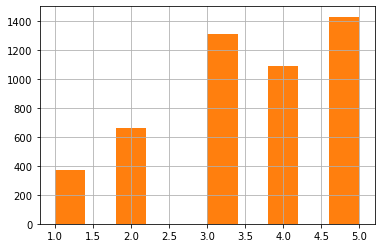

In [370]:
r_rating_cat_test.hist()
r_rating_cat_train.hist()

In [371]:
from sklearn import preprocessing
from sklearn import utils

#convert y values to categorical values
lab = preprocessing.LabelEncoder()
ratings_transformed_test = lab.fit_transform(r_rating_cat_test)
ratings_transformed_train = lab.fit_transform(r_rating_cat_train)

In [372]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
classifier3 = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 42)

classifier3.fit(train_listings_prepared, ratings_transformed_train)
y_pred_train = classifier3.predict(train_listings_prepared)
acc = accuracy_score(y_pred_train, ratings_transformed_train)
print(round(acc*100, 2), "%", sep="")

98.84%


In [373]:
y_pred_test = classifier3.predict(test_listings_prepared)
acc = accuracy_score(y_pred_test, ratings_transformed_test)
print(round(acc*100, 2), "%", sep="")

48.55%


In [374]:
from sklearn.dummy import DummyClassifier


clf = DummyClassifier(strategy='stratified')
clf.fit(train_listings_prepared, ratings_transformed_train)
y_pred_dummy = clf.predict(test_listings_prepared)
acc = accuracy_score(y_pred_dummy, ratings_transformed_test)
print(round(acc*100, 2), "%", sep="")

20.15%
